In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [562]:
combined_features = pd.read_csv('features/combined_features.csv', encoding='latin-1', engine='python')
immigration = pd.read_csv('data/OECD_acquisition_data_interpolated.csv', encoding='latin-1', engine='python')

In [464]:
print(combined_features.head())
print(immigration.head())

  country  year                                            feature     value
0     AUS  2000  All staff compensation as % of total expenditu...  73.66373
1     AUS  2000  All staff compensation as % of total expenditu...  66.72803
2     AUS  2000  All staff compensation as % of total expenditu...  75.69741
3     AUS  2000  All staff compensation as % of total expenditu...  68.32235
4     AUS  2000  All staff compensation as % of total expenditu...  72.82737
   Unnamed: 0  CO2  COU  Year  Value
0           0  GBR  BEL  2000  152.0
1           1  GBR  BEL  2001  274.0
2           2  GBR  BEL  2002  201.0
3           3  GBR  BEL  2003  126.0
4           4  GBR  BEL  2004  128.0


Check for every year the features that are always there

In [548]:
curr_features = combined_features['feature'].unique()

for i in range(2000, 2021):
    print('year: ' + str(i))
    new_combined_features = combined_features[combined_features['year'] == i].drop(columns=['year']).reset_index(drop=True)
    new_immigration = immigration.loc[immigration['Year'] == 2020].drop(columns=['Year']).reset_index(drop=True)
    new_immigration.drop(columns=['Unnamed: 0'], inplace=True)
    
    new_features = new_combined_features['feature'].unique()
    print(len(new_features))
    for feature in curr_features:
        if feature not in new_features:
            curr_features = np.delete(curr_features, np.where(curr_features == feature))

year: 2000
1561
year: 2001
686
year: 2002
1108
year: 2003
1217
year: 2004
1109
year: 2005
1008
year: 2006
1420


In [549]:
print(len(curr_features))

562


Now, we investigate these features

In [550]:
sub_combined_features = combined_features.loc[combined_features['year'] == year].drop(columns=['year']).reset_index(drop=True)
sub_immigration = immigration.loc[immigration['Year'] == year].drop(columns=['Year']).reset_index(drop=True)
sub_immigration.drop(columns=['Unnamed: 0'], inplace=True)
sub_combined_features = sub_combined_features[sub_combined_features['feature'].isin(curr_features)].reset_index(drop=True)

In [551]:
print(sub_combined_features.head())
print(sub_immigration.head())

  country                                            feature     value
0     AUS  Adjusted net enrolment rate, one year before t...   0.97951
1     AUS  Adjusted net enrolment rate, one year before t...  62.96296
2     AUS  Adjusted net enrolment rate, one year before t...  62.29380
3     AUS  Adjusted net enrolment rate, one year before t...  63.59716
4     AUS  All staff compensation as % of total expenditu...  69.76920
   CO2  COU  Value
0  GBR  BEL  141.0
1  GBR  GRC    9.0
2  GBR  CHE  323.0
3  GBR  SVN    2.0
4  GBR  ITA    0.0


In [552]:
# Pivot the dataframe
sub_pivot_features = pd.pivot_table(sub_combined_features, index=['country'], columns='feature', values='value').reset_index()

# Print the pivoted dataframe
sub_pivot_features.head(50)

feature,country,"Adjusted net enrolment rate, one year before the official primary entry age, adjusted gender parity index (GPIA)","Adjusted net enrolment rate, one year before the official primary entry age, both sexes (%)","Adjusted net enrolment rate, one year before the official primary entry age, female (%)","Adjusted net enrolment rate, one year before the official primary entry age, male (%)",All staff compensation as % of total expenditure in lower secondary public institutions (%),All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%),All staff compensation as % of total expenditure in pre-primary public institutions (%),All staff compensation as % of total expenditure in primary public institutions (%),All staff compensation as % of total expenditure in public institutions (%),...,Proportion of primary schools with access to Internet for pedagogical purposes (%),Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%),Proportion of primary schools with access to basic drinking water (%),Proportion of primary schools with access to computers for pedagogical purposes (%),Proportion of primary schools with access to electricity (%),Proportion of primary schools with basic handwashing facilities (%),Proportion of primary schools with single-sex basic sanitation facilities (%),Proportion of secondary schools with access to Internet for pedagogical purposes (%),Proportion of secondary schools with access to computers for pedagogical purposes (%),gdp
0,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310672e+04
1,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.015831e+05
2,AUS,0.97951,62.96296,62.29380,63.59716,69.76920,65.87050,NaN,72.93494,NaN,...,100.0,NaN,100.0,100.0,100.0,100.0,100.0,100.00000,100.0,4.069125e+05
3,AUT,0.99904,92.98879,92.94315,93.03219,77.25320,52.88118,74.32507,72.52339,72.05565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.745288e+05
4,BEL,0.99615,99.81138,99.61525,100.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,NaN,100.0,100.0,NaN,NaN,NaN,2.035726e+05
5,BGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.898081e+04
6,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.102391e+06
7,CAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.22983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.398695e+05
8,CHE,1.00413,98.93247,99.14269,98.73352,78.57025,76.29089,88.99880,75.33296,75.45526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.961330e+05
9,CHL,NaN,NaN,NaN,NaN,85.80999,NaN,90.94729,86.91665,77.44748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358297e+05


In [553]:
# Merge the datasets
combined_data = pd.merge(sub_immigration, sub_pivot_features, left_on='COU', right_on='country', how='left')
combined_data.drop(columns=['country'], inplace=True)
print(len(combined_data))
print(combined_data.columns)
combined_data.head()

702
Index(['CO2', 'COU', 'Value',
       'Adjusted net enrolment rate, one year before the official primary entry age, adjusted gender parity index (GPIA)',
       'Adjusted net enrolment rate, one year before the official primary entry age, both sexes (%)',
       'Adjusted net enrolment rate, one year before the official primary entry age, female (%)',
       'Adjusted net enrolment rate, one year before the official primary entry age, male (%)',
       'All staff compensation as % of total expenditure in lower secondary public institutions (%)',
       'All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%)',
       'All staff compensation as % of total expenditure in pre-primary public institutions (%)',
       ...
       'Proportion of primary schools with access to Internet for pedagogical purposes (%)',
       'Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%)',
  

,CO2,COU,Value,"Adjusted net enrolment rate, one year before the official primary entry age, adjusted gender parity index (GPIA)","Adjusted net enrolment rate, one year before the official primary entry age, both sexes (%)","Adjusted net enrolment rate, one year before the official primary entry age, female (%)","Adjusted net enrolment rate, one year before the official primary entry age, male (%)",All staff compensation as % of total expenditure in lower secondary public institutions (%),All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%),All staff compensation as % of total expenditure in pre-primary public institutions (%),...,Proportion of primary schools with access to Internet for pedagogical purposes (%),Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%),Proportion of primary schools with access to basic drinking water (%),Proportion of primary schools with access to computers for pedagogical purposes (%),Proportion of primary schools with access to electricity (%),Proportion of primary schools with basic handwashing facilities (%),Proportion of primary schools with single-sex basic sanitation facilities (%),Proportion of secondary schools with access to Internet for pedagogical purposes (%),Proportion of secondary schools with access to computers for pedagogical purposes (%),gdp
0,GBR,BEL,141.0,0.99615,99.81138,99.61525,100.00000,NaN,NaN,NaN,...,NaN,NaN,100.0,NaN,100.0,100.0,NaN,NaN,NaN,203572.624490
1,GBR,GRC,9.0,0.98363,81.00651,80.32528,81.66236,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171574.394941
2,GBR,CHE,323.0,1.00413,98.93247,99.14269,98.73352,78.57025,76.29089,88.99880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196133.037659
3,GBR,SVN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,58.63006,...,100.0,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100.0,38660.194803
4,GBR,ITA,0.0,0.97790,98.92449,97.78989,100.00000,82.93278,7.21064,76.29677,...,NaN,NaN,100.0,NaN,100.0,100.0,100.0,NaN,NaN,959584.422610


In [554]:
# Drop columns with only NaN values
combined_data = combined_data.dropna(axis=1, how='all')
print(combined_data.isnull().sum().sum())

# Drop row with more than half NaN values
# combined_data = combined_data.dropna(thresh=len(combined_data) / 5)
# print(combined_data.isnull().sum().sum())

# Impute the rest of the NaN values with the mean of the column
for col in combined_data.columns[2:]:
    combined_data[col] = combined_data[col].fillna(combined_data[col].mean())
    
print(combined_data.isnull().sum().sum())

combined_data.head()

73164
0


,CO2,COU,Value,"Adjusted net enrolment rate, one year before the official primary entry age, adjusted gender parity index (GPIA)","Adjusted net enrolment rate, one year before the official primary entry age, both sexes (%)","Adjusted net enrolment rate, one year before the official primary entry age, female (%)","Adjusted net enrolment rate, one year before the official primary entry age, male (%)",All staff compensation as % of total expenditure in lower secondary public institutions (%),All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%),All staff compensation as % of total expenditure in pre-primary public institutions (%),...,Proportion of primary schools with access to Internet for pedagogical purposes (%),Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%),Proportion of primary schools with access to basic drinking water (%),Proportion of primary schools with access to computers for pedagogical purposes (%),Proportion of primary schools with access to electricity (%),Proportion of primary schools with basic handwashing facilities (%),Proportion of primary schools with single-sex basic sanitation facilities (%),Proportion of secondary schools with access to Internet for pedagogical purposes (%),Proportion of secondary schools with access to computers for pedagogical purposes (%),gdp
0,GBR,BEL,141.0,0.996150,99.811380,99.615250,100.000000,74.812825,59.592013,73.107708,...,99.855556,100.0,100.0,100.0,100.0,100.0,100.0,99.75304,100.0,203572.624490
1,GBR,GRC,9.0,0.983630,81.006510,80.325280,81.662360,74.812825,59.592013,73.107708,...,99.855556,100.0,100.0,100.0,100.0,100.0,100.0,99.75304,100.0,171574.394941
2,GBR,CHE,323.0,1.004130,98.932470,99.142690,98.733520,78.570250,76.290890,88.998800,...,99.855556,100.0,100.0,100.0,100.0,100.0,100.0,99.75304,100.0,196133.037659
3,GBR,SVN,2.0,0.999689,94.279224,94.328084,94.300929,74.812825,59.592013,58.630060,...,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0,38660.194803
4,GBR,ITA,0.0,0.977900,98.924490,97.789890,100.000000,82.932780,7.210640,76.296770,...,99.855556,100.0,100.0,100.0,100.0,100.0,100.0,99.75304,100.0,959584.422610


In [555]:
# from sklearn.impute import KNNImputer
# print(combined_data.isnull().sum().sum())
# # Handle missing values using KNN imputation
# imputer = KNNImputer(n_neighbors=3)  # Adjust the number of neighbors as needed
# combined_data_imputed = imputer.fit_transform(combined_data.drop(['CO2', 'COU','Value'], axis=1))
# print(combined_data.drop(['CO2', 'COU','Value'], axis=1).shape)
# print(combined_data_imputed.shape)
# combined_data_imputed = pd.DataFrame(combined_data_imputed, columns=combined_data.columns[3:])
# combined_data_imputed[['CO2', 'COU','Value']] = combined_data[['CO2', 'COU','Value']]
# print(combined_data_imputed.isnull().sum().sum())
# combined_data_imputed.head()

0 -> Gross enrolment ratio, primary, gender parity index (GPI), Importance: 1.0
1 -> Labor force with advanced education, female (% of female labor force), Importance: 0.20705624507417159
2 -> Official entrance age to early childhood educational development (years), Importance: 0.08693589329403004
3 -> Personal computers (per 100 people), Importance: 0.07406701377352479
4 -> Outbound mobility ratio, all regions, both sexes (%), Importance: 0.059516333383755705
5 -> Population, age 3, female, Importance: 0.03518461710352265
6 -> Population, age 17, male, Importance: 0.035085075767305074
7 -> Gross enrolment ratio, early childhood education, female (%), Importance: 0.03310174841745776
8 -> Non-teaching staff compensation as a percentage of total expenditure in tertiary public institutions (%), Importance: 0.02805042238992494
9 -> Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, male (%), Importance: 0.026641902935106664


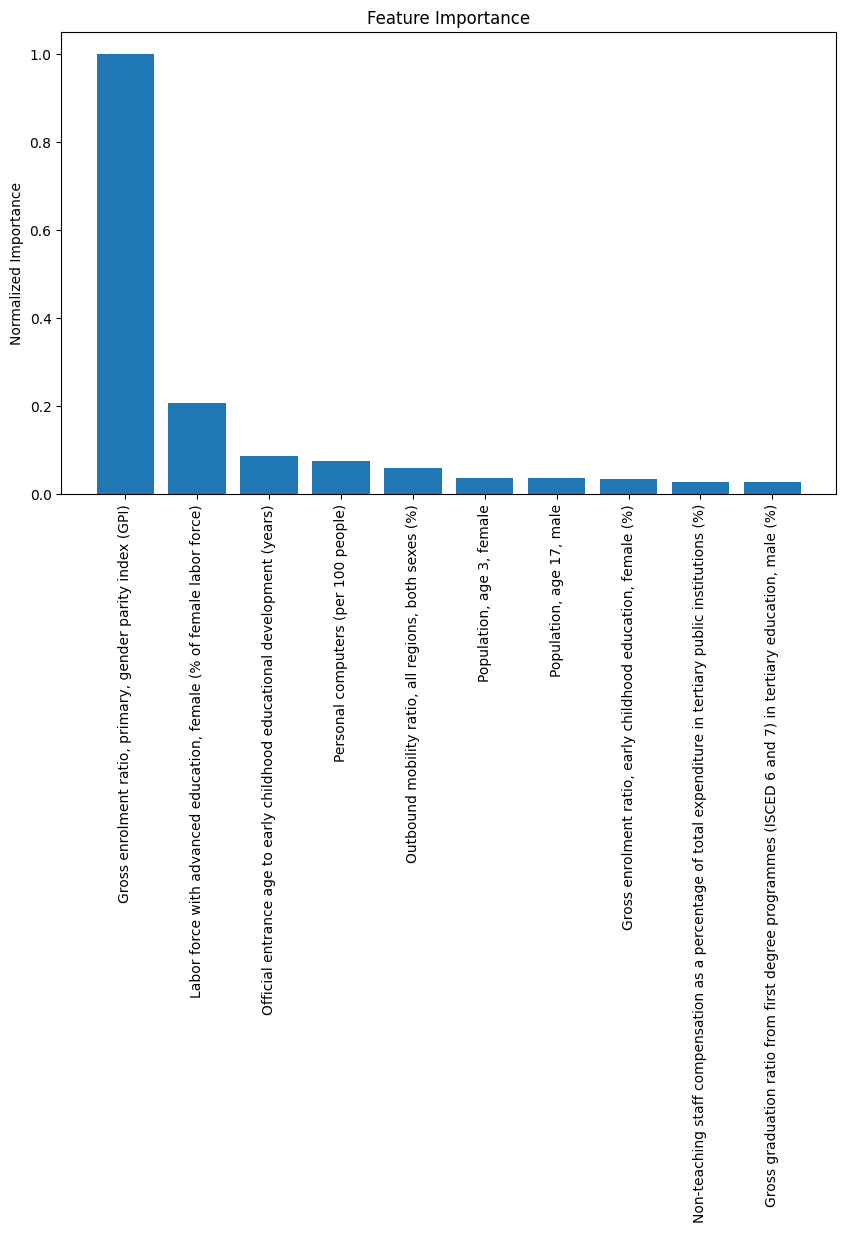

In [556]:
from sklearn.ensemble import RandomForestRegressor

# Split the data
X = combined_data.drop(['CO2', 'COU', 'Value'], axis=1)  # Features
y = combined_data['Value']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Get the absolute feature importances
feature_importances = model.feature_importances_
normalized_importance = (feature_importances - feature_importances.min()) / (feature_importances.max() - feature_importances.min())

# Sort the feature importances in descending order
sorted_indices = np.argsort(normalized_importance)[::-1]

nbr_features = 10

# Select the top X features
top_features_indices = sorted_indices[:nbr_features]

# Get the names of the top X features
top_features = X.columns[top_features_indices]

best_importance=[]
# Print the top X features and their importances
counter=0
for feature, importance in zip(top_features, normalized_importance[top_features_indices]):
    best_importance.append(importance)
    print(f"{counter} -> {feature}, Importance: {importance}")
    counter+=1
    
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(best_importance)), best_importance, align='center')
plt.xticks(range(len(top_features)), top_features, rotation='vertical')
plt.ylabel('Normalized Importance')
plt.title('Feature Importance')
plt.show()


In [557]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 855.39
Mean squared error = 47647803.97
Median absolute error = 46.0
Explain variance score = 0.05
R2 score = 0.04


### Now compute the best features that appears in most of the years

In [566]:
def run_feature_analysis_per_year(best_features,year):

    curr_features = combined_features['feature'].unique()

    for i in range(2000, year + 1):
        new_combined_features = combined_features[combined_features['year'] == i].drop(columns=['year']).reset_index(drop=True)
        new_immigration = immigration.loc[immigration['Year'] == 2020].drop(columns=['Year']).reset_index(drop=True)
        new_immigration.drop(columns=['Unnamed: 0'], inplace=True)
        
        new_features = new_combined_features['feature'].unique()
        for feature in curr_features:
            if feature not in new_features:
                curr_features = np.delete(curr_features, np.where(curr_features == feature))



    sub_combined_features = combined_features.loc[combined_features['year'] == year].drop(columns=['year']).reset_index(drop=True)
    sub_immigration = immigration.loc[immigration['Year'] == year].drop(columns=['Year']).reset_index(drop=True)
    sub_immigration.drop(columns=['Unnamed: 0'], inplace=True)
    sub_combined_features = sub_combined_features[sub_combined_features['feature'].isin(curr_features)].reset_index(drop=True)


    # Pivot the dataframe
    sub_pivot_features = pd.pivot_table(sub_combined_features, index=['country'], columns='feature', values='value').reset_index()


    # Merge the datasets
    combined_data = pd.merge(sub_immigration, sub_pivot_features, left_on='COU', right_on='country', how='left')
    combined_data.drop(columns=['country'], inplace=True)
    combined_data.head()


    # Drop columns with only NaN values
    combined_data = combined_data.dropna(axis=1, how='all')

    # Impute the rest of the NaN values with the mean of the column
    for col in combined_data.columns[2:]:
        combined_data[col] = combined_data[col].fillna(combined_data[col].mean())
        

    # Split the data
    X = combined_data.drop(['CO2', 'COU', 'Value'], axis=1)  # Features
    y = combined_data['Value']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training and evaluation
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Get the absolute feature importances
    feature_importances = model.feature_importances_
    normalized_importance = (feature_importances - feature_importances.min()) / (feature_importances.max() - feature_importances.min())

    # Sort the feature importances in descending order
    sorted_indices = np.argsort(normalized_importance)[::-1]

    nbr_features = 10

    # Select the top X features
    top_features_indices = sorted_indices[:nbr_features]

    # Get the names of the top X features
    top_features = X.columns[top_features_indices]

    best_features.append(top_features)
    
    return best_features


In [568]:
best_features = []

for i in range(2000, 2021):
    print('year: ', i)
    best_features = run_feature_analysis_per_year(best_features, i)

year:  2000
year:  2001
year:  2002
year:  2003
year:  2004
year:  2005
year:  2006
year:  2007
year:  2008
year:  2009
year:  2010
year:  2011
year:  2012
year:  2013
year:  2014
year:  2015
year:  2016
year:  2017
year:  2018
year:  2019
year:  2020


In [569]:
# Create a DataFrame from the list of lists
df_best_features = pd.DataFrame(best_features)

# Save the DataFrame to an Excel file
output_file = 'best_features.xlsx'
df_best_features.to_excel(output_file, index=False)

Get 10 best features

In [571]:
best_nbr_features = 10

# Flatten the DataFrame into a single column
feature_column = df_best_features.values.flatten()

# Get the value counts of each feature
feature_counts = pd.Series(feature_column).value_counts()

# Get the top features that occur the most frequently
best_of_best_features = feature_counts.head(best_nbr_features)

print(best_of_best_features)

Net flow of internationally mobile students (inbound - outbound), both sexes (number)                  14
Official entrance age to early childhood educational development (years)                               11
GDP at market prices (constant 2005 US$)                                                                7
Adjusted net enrolment rate, one year before the official primary entry age, male (%)                   6
Adjusted net enrolment rate, one year before the official primary entry age, both sexes (%)             6
gdp                                                                                                     5
Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, male (%)     5
Gross enrolment ratio, primary, gender parity index (GPI)                                               5
Out-of-school rate for children one year younger than official primary entrance age, both sexes (%)     5
Outbound mobility ratio, all regions, both sex